In [1]:
import openjij.cxxjij as oj
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import src.utils as utils
from datetime import datetime
%load_ext autoreload
%autoreload 2
#%matplotlib ipympl

In [2]:
N = 104
np_J = np.random.randn(N, N)
hidden_size = 64
output_size = 40
np_J[:hidden_size, :hidden_size] = 0   # hidden never directly connect with other hidden
np_J[-output_size:, -output_size:] = 0 # output never directly connect with other output
#np_J = np.ones((N, N)) * -1
np.fill_diagonal(np_J, 0)
np_H = np.ones(N) * 0

J = utils.convert_to_jijDense(np_J, np_H)
print(J.get_interactions())

[[ 0.          0.          0.         ...  1.40502013  0.42772308
   0.        ]
 [ 0.          0.          0.         ...  1.60704804  0.23295011
   0.        ]
 [ 0.          0.          0.         ... -0.37224261  2.40318362
   0.        ]
 ...
 [ 1.40502013  1.60704804 -0.37224261 ...  0.          0.
   0.        ]
 [ 0.42772308  0.23295011  2.40318362 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [3]:
len(J.gen_spin())

104

In [14]:
mysystem = oj.system.make_classical_ising(J.gen_spin(), J)
#cache = np.array(oj.result.get_solution(mysystem))
#print(cache)
#Take a longer schedule (total of 20000 Monte Carlo steps)
energies = []
def callback_log_energy(system, beta):
    #graph is the object defined previously in the Graph module
    energies.append(J.calc_energy(system.spin))
#schedule_list = U.make_classical_schedule_list(0.1, 50, 200, 1000)
num_temp_steps = 2**4
walk_per_temp = 2**0

schedule_list = oj.utility.make_classical_schedule_list(2**-6, 2**10, walk_per_temp, num_temp_steps) # inverse temp increase from  0.1 to 50 (T=10 -> 0.02)

N_test = 4000000
durations = np.zeros(N_test)
for i in range(N_test):
    start = datetime.now()
    oj.algorithm.Algorithm_SingleSpinFlip_run(mysystem, schedule_list)#, callback_log_energy)
    end = datetime.now()
    durations[i] = (end - start).microseconds
print(durations.mean())
print(durations.std())

# E = np.array(energies)
# print(np.min(E))
# schedule_list = oj.utility.make_classical_schedule_list(2**-6, 2**100, walk_per_temp, num_temp_steps2) # inverse temp increase from  0.1 to 50 (T=10 -> 0.02)
# oj.algorithm.Algorithm_SingleSpinFlip_run(mysystem, schedule_list, callback_log_energy)
# E = np.array(energies)
# print(np.min(E))

61.29537375
11.471910764899231


In [15]:
print(durations.max())
print(durations.min())

8151.0
55.0


In [16]:
(durations/10**6).sum()

245.18149499999984

In [17]:
print(durations.mean())
print(2 * durations.std() / np.sqrt(N_test))

61.29537375
0.01147191076489923


In [ ]:
0.0001060
0.002

In [7]:
11.333 / 2**(22-5)

8.646392822265625e-05

104


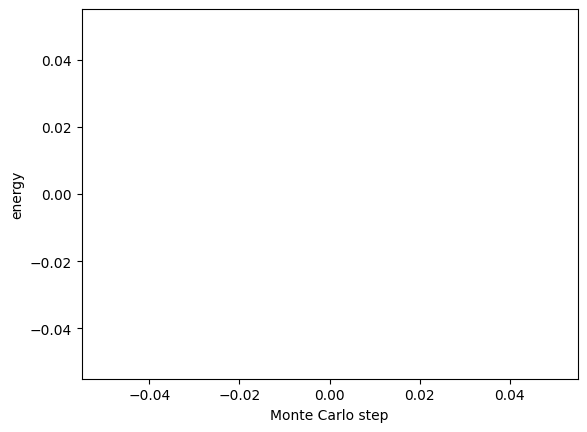

In [16]:
plt.plot(range(len(energies)), energies)
plt.xlabel('Monte Carlo step')
plt.ylabel('energy')

lattice_after = np.array(oj.result.get_solution(mysystem))
print(len(lattice_after))
#print(cache)
#print(lattice_after)
#E = np.array(energies)
#print(np.min(E))
plt.show()